In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import pandas as pd
import utils
from utils import compg, compl, time_idx, confidence_border
import pickle
import random

### Set up basic variables

In [2]:
ldic = {'d': 'δ',
        'th': 'θ',
        'a': 'α',
        'b': 'β',
        'g': 'γ',
        'hg': 'High γ'}

In [3]:
ranges = [
    "(1-3Hz)",
    "(4-7Hz)",
    "(8-12Hz)",
    "(13-30Hz)",
    "(31-50Hz)",
    "(70-150Hz)"
]

In [4]:
vowels = ['eh','ow','ah','iy','ih','uw','ae',
          'ay','aw','aa','ey','a','aan','uh',
          'ao','e','o','oy','i','eeh']
cons = ['hh','l','w','k','m','t','dh','s','dx',
              'n','r','sh','p','jh','z','v','ch','f','b','h',
              'd','th','nx','ng','tq','g','dx_t','dx_d','zh']
sounds = vowels + cons

In [5]:
bands = ['d','th','a','b','g','hg']

In [6]:
sub_ses = [['SD010','01'],
           ['SD011','01'],
           ['SD012','02'],
           ['SD017','01'],
           ['SD018','01'],
           ['SD019','01'],
           ['SD021','01'],
           ['SD022','01']]

### Set up necessary data

In [7]:
with open('Figure3-S2-S3-S5/monte-carlo-general-dic.pkl','rb') as f:
    band_dic = pickle.load(f)

In [8]:
with open('Figure3-S2-S3-S5/monte-carlo-initial-dic.pkl','rb') as f:
    init_band_dic = pickle.load(f)

In [10]:
with open('Figure3-S2-S3-S5/monte-carlo-final-dic.pkl','rb') as f:
    fin_band_dic = pickle.load(f)

In [11]:
for band in bands:
    band_dic[band]['coord']= np.array([[x,y] for x,y in zip(band_dic[band]['etics'], band_dic[band]['ology'])])
    init_band_dic[band]['coord']= np.array([[x,y] for x,y in zip(init_band_dic[band]['etics'], init_band_dic[band]['ology'])])
    fin_band_dic[band]['coord']= np.array([[x,y] for x,y in zip(fin_band_dic[band]['etics'], fin_band_dic[band]['ology'])])

In [12]:
sig_t_dic = pickle.load(open('Figure3-S2-S3-S5/sig_chs_all_bands_tap-t.pkl','rb'))
sig_d_dic = pickle.load(open('Figure3-S2-S3-S5/sig_chs_all_bands_tap-d.pkl','rb'))
sig_pls_dic = pickle.load(open('Figure3-S2-S3-S5/sig_chs_all_bands_plural-s.pkl','rb'))
sig_plz_dic = pickle.load(open('Figure3-S2-S3-S5/sig_chs_all_bands_plural-z.pkl','rb'))
sig_pst_dic = pickle.load(open('Figure3-S2-S3-S5/sig_chs_all_bands_past-t.pkl','rb'))
sig_psd_dic = pickle.load(open('Figure3-S2-S3-S5/sig_chs_all_bands_past-d.pkl','rb'))

### Plot initial and final position vs. null distribution

This is Figure S3

prepping band d...
prepping band th...
prepping band a...
prepping band b...
prepping band g...
prepping band hg...


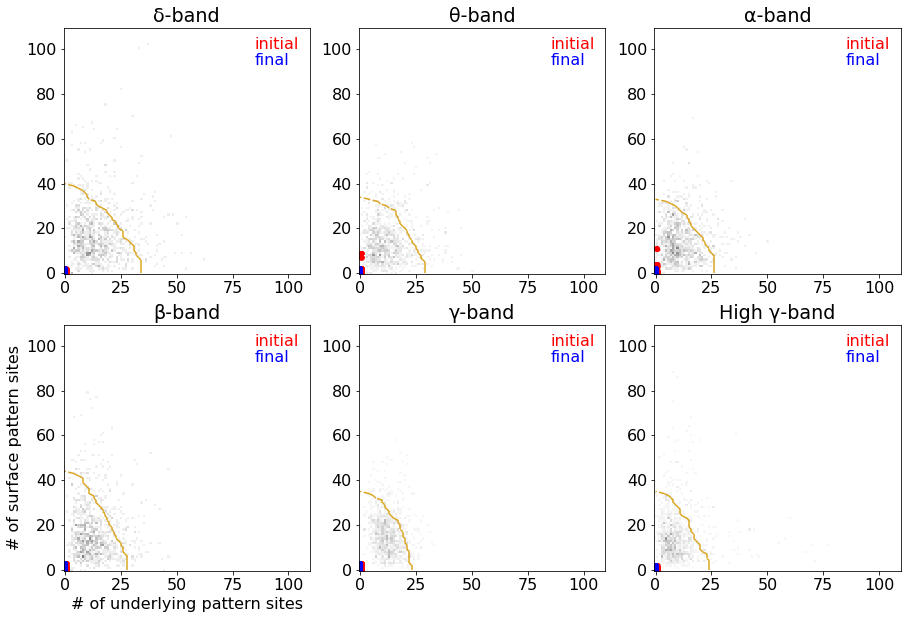

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
for idx, band in enumerate(bands):
    print('prepping band %s...'%band)
    tot_count = band_dic[band]['coord']
    zs = np.zeros((110,110))
    for i, [e, o] in enumerate(tot_count):
        zs[e,o] +=1
    ax[int(idx/3),idx%3].imshow(zs, origin='lower',interpolation='none', cmap='binary')
    inits = np.zeros((110,110))
    finals = np.zeros((110,110))
    for i, [point_x, point_y] in enumerate(init_band_dic[band]['coord']):
        jittered_y = point_y + 0.2 * np.random.rand(len(init_band_dic[band]['coord'])) -0.05
        jittered_x = point_x + 1 * np.random.rand(len(init_band_dic[band]['coord'])) -0.05
        ax[int(idx/3),idx%3].scatter(jittered_x,jittered_y, c='r', s=10, alpha=0.6)
    for i, [point_x, point_y] in enumerate(fin_band_dic[band]['coord']):
        jittered_y = point_y + 0.2 * np.random.rand(len(fin_band_dic[band]['coord'])) -0.05
        jittered_x = point_x + 0.2 * np.random.rand(len(fin_band_dic[band]['coord'])) -0.05
        ax[int(idx/3),idx%3].scatter(jittered_x,jittered_y, c='b', s=10, alpha=0.6)
    #legend
    ax[int(idx/3),idx%3].text(85, 100, "initial", c='r')
    ax[int(idx/3),idx%3].text(85, 93, "final", c='b')
    confidence_border(zs, ax[int(idx/3),idx%3], band_dic, band,'goldenrod')
    ax[int(idx/3),idx%3].set_title("%s-band"%ldic[band])
    if idx == 3:
        ax[int(idx/3),idx%3].set_xlabel('# of underlying pattern sites')
        ax[int(idx/3),idx%3].set_ylabel('# of surface pattern sites')
plt.show()

### Plot feature distance vs. null distribution

This is Figure S2

In [14]:
with open('riggle_features.csv','r') as f:
    df = pd.read_csv(f, delimiter=',', quotechar='|',header=0,index_col=0)
    
df1 = df.drop(columns=['ɬ', 'ɮ','c', 'ɟ', 'ç', 'ʝ',
       'ʈ', 'ɖ', 'ʂ', 'ʐ', 'ɸ', 'β','x', 'ɣ',
       'q', 'ɢ', 'χ','ɦ', 'ʁ', 'ħ', 'ʕ','ʦ', 'ʣ', 'kx',
       'pf','ɱ','ɳ', 'ɲ', 'ɴ', 'ɭ', 'ʎ', 'ʟ', 'ⱱ', 'ɽ', 
        'ʙ','ʀ', 'ʋ','ɻ','ɥ', 'ɰ','y','ʏ', 'ɯ', 'ø', 'ɘ', 
        'ɵ', 'ɤ','ɐ', 'œ', 'ɜ', 'ɞ','ɶ','ɨ', 'ʉ','ɒ','ɑ'])
df1['t']=df1['d']
df1.at['voice','t']='-'

chart = []
for c1 in list(df1.columns):
    row = []
    for c2 in list(df1.columns):
        row.append((df1[c1] != df1[c2]).sum())
    chart.append(row)
chart = pd.DataFrame(chart, index=list(df1.columns),columns=list(df1.columns))

In [15]:
def feature_distance(p1,p2,distance_chart):

    ipa_arpa = {'t':'t', 'd':'d', 's':'s', 'z':'z', 
               'θ':'th', 'ð':'dh', 'ʃ':'sh', 'ʒ':'zh', 
               'p':'p', 'b':'b', 'f':'f', 'v':'v', 'k':'k', 'ɡ':'g',
               'h':'hh', 'ʔ':'tx', 'ʧ':'ch', 'ʤ':'jh', 'm':'m', 'n':'n', 
               'ŋ':'ng', 'l':'l', 'ɾ':'dx_t', 'ɹ':'r', 'j':'y', 'w':'w',
               'i':'iy', 'ɪ':'ih', 'u':'uw', 'ʊ':'uh', 'e':'ey', 'o':'ow', 
               'ə':'ah', 'ɛ':'eh', 'ʌ':'ah', 'ɔ':'ao', 'æ':'ae', 'a':'aa'}
    arpa_ipa = {v: k for k, v in ipa_arpa.items()}
    try: 
        distance = distance_chart.at[arpa_ipa[p1],arpa_ipa[p2]]
        #print(p1,":",arpa_ipa[p1],' ',p2,":",arpa_ipa[p2],' ',distance)
    except Exception as e:
        distance = 40
    return distance

prepping band d....
prepping band th....
prepping band a....
prepping band b....
prepping band g....
prepping band hg....


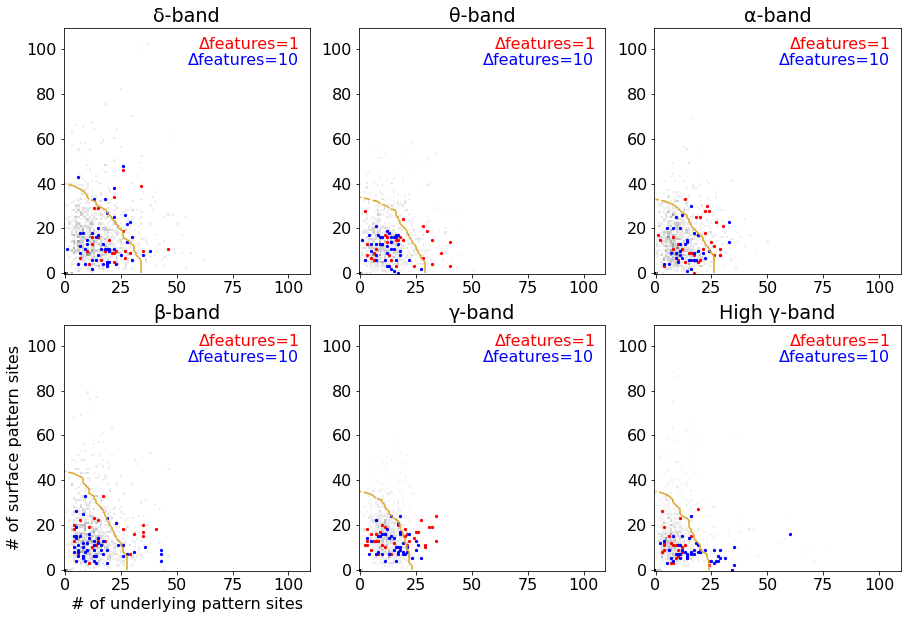

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
for idx, band in enumerate(bands):
    print('prepping band %s....'%band)
    tot_count = band_dic[band]['coord']
    zs = np.zeros((110,110))
    pts1 = []
    pts2 = []
    for i, [e, o] in enumerate(tot_count):
        [p1,p2] = band_dic[band]['phone_pair'][i]
        if feature_distance(p1,p2,chart) == 1 :
            pts1.append([e,o])
        if feature_distance(p1,p2,chart) == 10 :
            pts2.append([e,o])
        zs[e,o] +=1
    ax[int(idx/3),idx%3].imshow(zs, origin='lower',interpolation='none', cmap='binary')
    for i, [point_x, point_y] in enumerate(pts1):
        ax[int(idx/3),idx%3].scatter(point_x,point_y, c='r', s=5)
    for i, [point_x, point_y] in enumerate(pts2):
        ax[int(idx/3),idx%3].scatter(point_x,point_y, c='b', s=5)
    #legend
    ax[int(idx/3),idx%3].text(60, 100, "Δfeatures=1", c='r')
    ax[int(idx/3),idx%3].text(55, 93, "Δfeatures=10", c='b')
    confidence_border(zs, ax[int(idx/3),idx%3], band_dic, band,'goldenrod')
    ax[int(idx/3),idx%3].set_title("%s-band"%ldic[band])
    if idx == 3:
        ax[int(idx/3),idx%3].set_xlabel('# of underlying pattern sites')
        ax[int(idx/3),idx%3].set_ylabel('# of surface pattern sites')
plt.show()

### Plot tap, plural, and past patterns -- both anchors

This is Figure S5

prepping band d...
prepping band th...
prepping band a...
prepping band b...
prepping band g...
prepping band hg...


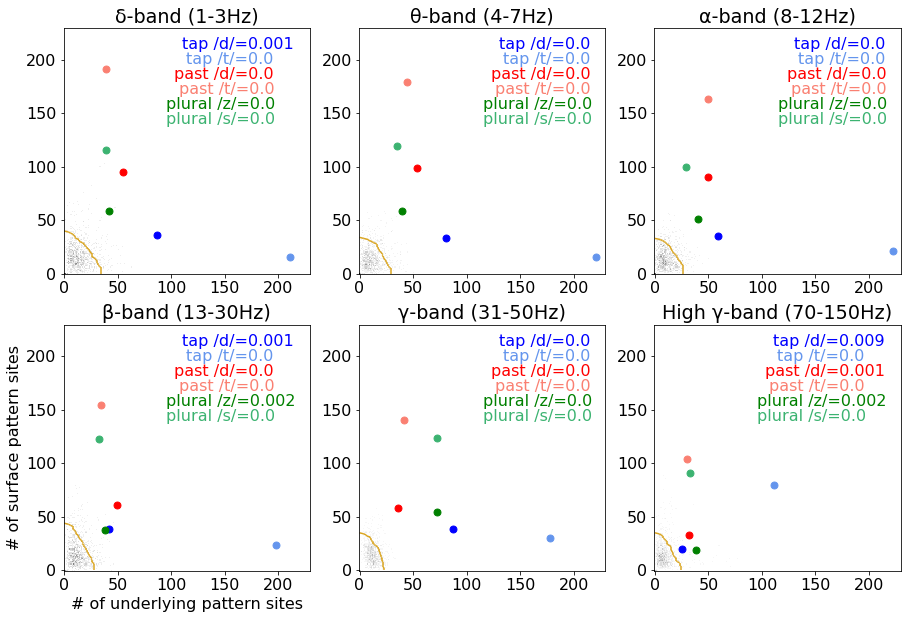

In [17]:
dicset = [sig_d_dic, sig_t_dic, sig_psd_dic, sig_pst_dic, sig_plz_dic, sig_pls_dic]
colors = ['blue','cornflowerblue','red','salmon','green','mediumseagreen']
labels = ['tap /d/', 'tap /t/', 'past /d/', 'past /t/', 'plural /z/', 'plural /s/']

fig, ax = plt.subplots(2, 3, figsize=(15,10))
for idx, band in enumerate(bands):
    print('prepping band %s...'%band)
    tot_count = band_dic[band]['coord']
    points, probs = [], []
    for dic in dicset:
        etics_y = np.sum([len(dic[band]['sig_etics'][subj]) for subj in dic[band]['sig_etics'].keys()])
        ology_x = np.sum([len(dic[band]['sig_ology'][subj]) for subj in dic[band]['sig_ology'].keys()])
        points.append([ology_x, etics_y])
        prob = len([[x,y] for [x,y] in tot_count if x>=ology_x and y>=etics_y]) / len(tot_count)
        probs.append(np.around(prob, 3))
    zs = np.zeros((230,230))
    for [e, o] in tot_count:
        zs[e,o] +=1

    ax[int(idx/3),idx%3].imshow(zs, origin='lower',interpolation='none', cmap='binary')
    if band in ['hg','d','b']:
        cords=[[110,210],[114,196],[103,182], [107,168],[95,154],[95,140]]
    else: cords=[[130,210],[134,196],[123,182], [127,168],[115,154],[115,140]]
    for i, [point_x, point_y] in enumerate(points):
        ax[int(idx/3),idx%3].scatter(point_x,point_y, c=colors[i], s=48)
        ax[int(idx/3),idx%3].text(cords[i][0], cords[i][1], "%s=%s"%(labels[i],probs[i]), c=colors[i])
    confidence_border(zs, ax[int(idx/3),idx%3], band_dic, band,'goldenrod')
    ax[int(idx/3),idx%3].set_title("%s-band %s"%(ldic[band], ranges[idx]))
    if idx == 3:
        ax[int(idx/3),idx%3].set_xlabel('# of underlying pattern sites')
        ax[int(idx/3),idx%3].set_ylabel('# of surface pattern sites')
plt.show()

### Plot tap, plural, and past patterns -- linguistically motivated anchors

This is Figure 3
/t/ anchor for tap, /d/ anchor for past, and /z/ anchor for plural

prepping band d...
prepping band th...
prepping band a...
prepping band b...
prepping band g...
prepping band hg...


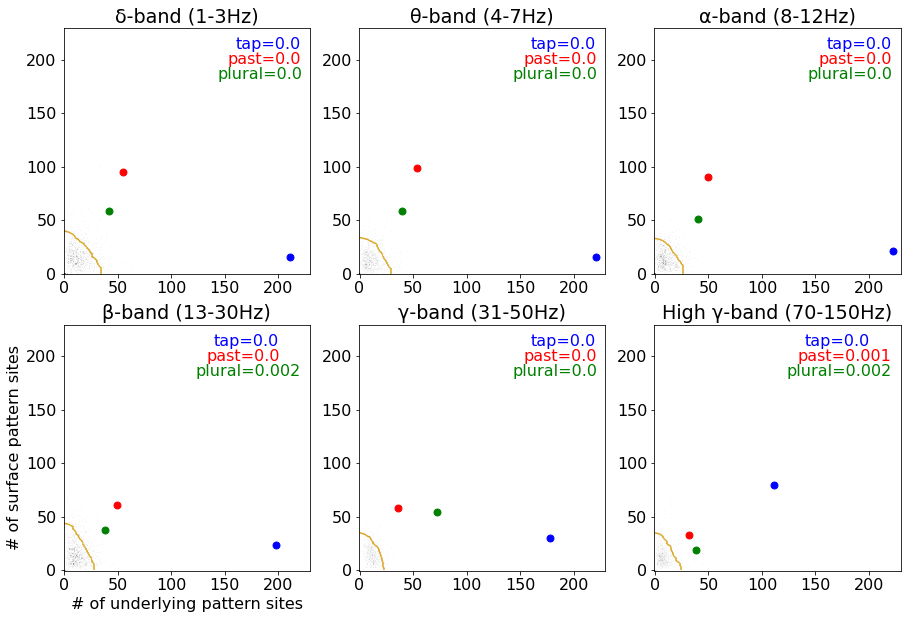

In [19]:
## /t/ anchor for tap, /d/ anchor for past, and /z/ anchor for plural
dicset = [sig_t_dic, sig_psd_dic, sig_plz_dic]
colors = ['blue','red','green']
labels = ['tap','past','plural']

fig, ax = plt.subplots(2, 3, figsize=(15,10))
for idx, band in enumerate(bands):
    print('prepping band %s...'%band)
    tot_count = band_dic[band]['coord']
    points, probs = [], []
    for dic in dicset:
        etics_y = np.sum([len(dic[band]['sig_etics'][subj]) for subj in dic[band]['sig_etics'].keys()])
        ology_x = np.sum([len(dic[band]['sig_ology'][subj]) for subj in dic[band]['sig_ology'].keys()])
        points.append([ology_x, etics_y])
        prob = len([[x,y] for [x,y] in tot_count if x>=ology_x and y>=etics_y]) / len(tot_count)
        probs.append(np.around(prob, 3))
    zs = np.zeros((230,230))
    for [e, o] in tot_count:
        zs[e,o] +=1

    #plt.gca().xaxis.tick_bottom()
    ax[int(idx/3),idx%3].imshow(zs, origin='lower',interpolation='none', cmap='binary')
    if band in ['hg','b']:
        cords=[[140,210],[133,196],[123,182]]
    else: cords=[[160,210],[153,196],[143,182]]
    for i, [point_x, point_y] in enumerate(points):
        ax[int(idx/3),idx%3].scatter(point_x,point_y, c=colors[i], s=48)
        ax[int(idx/3),idx%3].text(cords[i][0], cords[i][1], "%s=%s"%(labels[i],probs[i]), c=colors[i])
    confidence_border(zs, ax[int(idx/3),idx%3], band_dic, band,'goldenrod')
    ax[int(idx/3),idx%3].set_title("%s-band %s"%(ldic[band], ranges[idx]))
    if idx == 3:
        ax[int(idx/3),idx%3].set_xlabel('# of underlying pattern sites')
        ax[int(idx/3),idx%3].set_ylabel('# of surface pattern sites')
plt.show()

### Plot tap, plural, and past patterns -- complement anchors

/d/ anchor for tap, /t/ anchor for past, and /s/ anchor for plural


prepping band d...
prepping band th...
prepping band a...
prepping band b...
prepping band g...
prepping band hg...


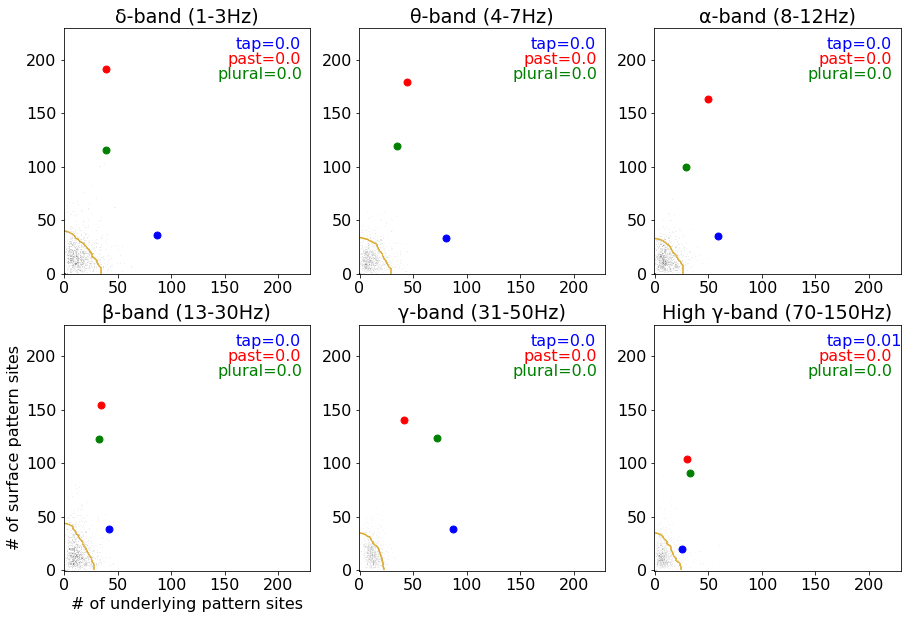

In [22]:
## /d/ anchor for tap, /t/ anchor for past, and /s/ anchor for plural
dicset = [sig_d_dic, sig_pst_dic, sig_pls_dic]
colors = ['blue','red','green']
labels = ['tap','past','plural']

fig, ax = plt.subplots(2, 3, figsize=(15,10))
for idx, band in enumerate(bands):
    print('prepping band %s...'%band)
    tot_count = band_dic[band]['coord']
    points, probs = [], []
    for dic in dicset:
        etics_y = np.sum([len(dic[band]['sig_etics'][subj]) for subj in dic[band]['sig_etics'].keys()])
        ology_x = np.sum([len(dic[band]['sig_ology'][subj]) for subj in dic[band]['sig_ology'].keys()])
        points.append([ology_x, etics_y])
        prob = len([[x,y] for [x,y] in tot_count if x>=ology_x and y>=etics_y]) / len(tot_count)
        probs.append(np.around(prob, 2))
    zs = np.zeros((230,230))
    for [e, o] in tot_count:
        zs[e,o] +=1

    #plt.gca().xaxis.tick_bottom()
    ax[int(idx/3),idx%3].imshow(zs, origin='lower',interpolation='none', cmap='binary')
    cords=[[160,210],[153,196],[143,182]]
    for i, [point_x, point_y] in enumerate(points):
        ax[int(idx/3),idx%3].scatter(point_x,point_y, c=colors[i], s=48)
        ax[int(idx/3),idx%3].text(cords[i][0], cords[i][1], "%s=%s"%(labels[i],probs[i]), c=colors[i])
    confidence_border(zs, ax[int(idx/3),idx%3], band_dic, band,'goldenrod')
    ax[int(idx/3),idx%3].set_title("%s-band %s"%(ldic[band], ranges[idx]))
    if idx == 3:
        ax[int(idx/3),idx%3].set_xlabel('# of underlying pattern sites')
        ax[int(idx/3),idx%3].set_ylabel('# of surface pattern sites')
plt.show()

### Plot tap, plural, and past patterns -- voiced anchors

/d/ anchor for tap, /d/ anchor for past, and /z/ anchor for plural

(110, 110)
(110, 110)
(110, 110)
(110, 110)
(110, 110)
(110, 110)


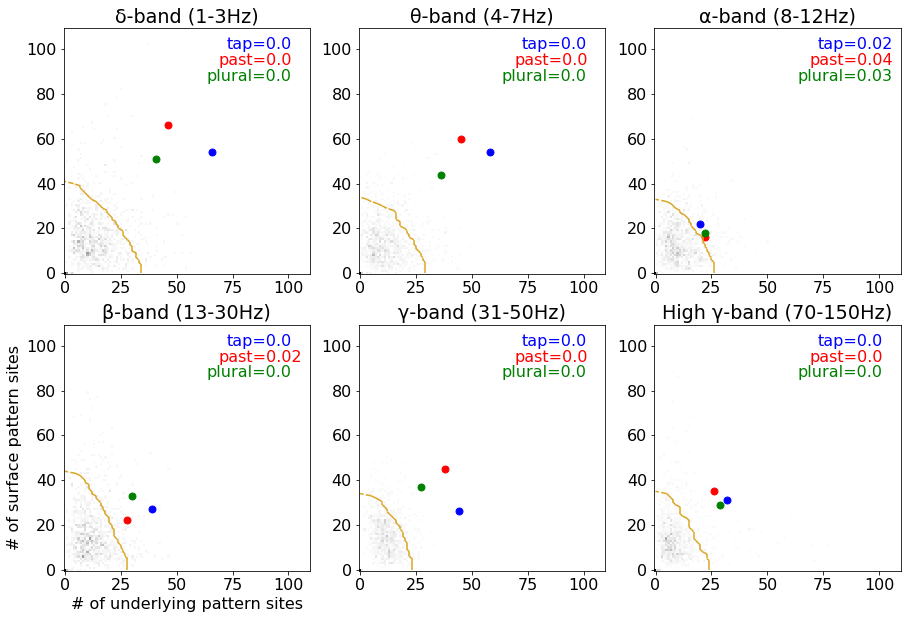

In [129]:
dicset = [sig_d_dic, sig_psd_dic, sig_plz_dic]
colors = ['blue','red','green']
labels = ['tap','past','plural']

fig, ax = plt.subplots(2, 3, figsize=(15,10))
for idx, band in enumerate(bands):
    print('prepping band %s...'%band)
    tot_count = band_dic[band]['coord']
    points, probs = [], []
    for dic in dicset:
        etics_y = np.sum([len(dic[band]['sig_etics'][subj]) for subj in dic[band]['sig_etics'].keys()])
        ology_x = np.sum([len(dic[band]['sig_ology'][subj]) for subj in dic[band]['sig_ology'].keys()])
        points.append([ology_x, etics_y])
        prob = len([[x,y] for [x,y] in tot_count if x>=ology_x and y>=etics_y]) / len(tot_count)
        probs.append(np.around(prob, 2))
    zs = np.zeros((110,110))
    print(zs.shape)
    for [e, o] in tot_count:
        zs[e,o] +=1

    #plt.gca().xaxis.tick_bottom()
    ax[int(idx/3),idx%3].imshow(zs, origin='lower',interpolation='none', cmap='binary')
    cords=[[72.3,100],[68.8,93],[63.4,86]]
    for i, [point_x, point_y] in enumerate(points):
        ax[int(idx/3),idx%3].scatter(point_x,point_y, c=colors[i], s=48)
        ax[int(idx/3),idx%3].text(cords[i][0], cords[i][1], "%s=%s"%(labels[i],probs[i]), c=colors[i])
    confidence_border(zs, ax[int(idx/3),idx%3], band_dic, band,'goldenrod')
    ax[int(idx/3),idx%3].set_title("%s-band %s"%(ldic[band], ranges[idx]))
    if idx == 3:
        ax[int(idx/3),idx%3].set_xlabel('# of underlying pattern sites')
        ax[int(idx/3),idx%3].set_ylabel('# of surface pattern sites')
plt.show()